In [22]:
import xarray as xr
import numpy as np

#for plotting
import cmocean
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [ ]:
def add_global_map_subplot(fig,da,gridspec,vmin,vmax,cmap,subplot_title,hatch_condition,add_cbar='below',cbar_label=None,cbar_extend=None):
    ''' add a subplot with a global map of da to a figure'''
    ax = fig.add_subplot(gridspec,projection=ccrs.Robinson(central_longitude=0))
    
    p=da.plot(transform=ccrs.PlateCarree(),vmin=vmin,vmax=vmax,cmap=cmap,ax=ax,add_colorbar=False,rasterized=True) #SSLA
    p.set_edgecolor('face')
    if hatch_condition is not None:
        density=7
        ax.contourf(da.lon, da.lat, hatch_condition,transform=ccrs.PlateCarree(),colors='none',levels=[.5,1.5],hatches=[density*'/',density*'/'])

    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=1, color='lightgrey', alpha=0, linestyle='-')
    gl.top_labels = gl.right_labels = False #don't label top and right axes
    gl.xlabel_style = {'color': 'black','rotation':0}
    gl.ylabel_style = {'color': 'black','rotation':0}
                                                                   
    ax.coastlines(resolution='50m',color='black')
    ax.set_title(subplot_title)
    ax.set_extent([-180,180,-65,65], crs=ccrs.PlateCarree())

    if add_cbar=='below':
        cax=inset_axes(ax,width="100%", height="100%",bbox_to_anchor=(.1, -.25,.8,.1),bbox_transform=ax.transAxes)
        fig.colorbar(p, cax=cax,orientation='horizontal',label=cbar_label,extend=cbar_extend)
    elif add_cbar =='right':
        cax=inset_axes(ax,width="100%", height="100%",bbox_to_anchor=(1.05, .025,.04,.95),bbox_transform=ax.transAxes)
        fig.colorbar(p, cax=cax,orientation='vertical',label=cbar_label,extend=cbar_extend)
    return fig,ax

In [8]:
#open input datasets
ssp='ssp370'

psmsl_range   = xr.open_dataset('psmsl_mean_alsc_range.nc').monmean
sla_ibe_range = xr.open_dataset('allsat_l4_duacs_sla_1993-2023_0.125deg_mean_alsc_range.nc').sla

tr_at_tgs   = xr.open_dataset('eot20_tr_at_psmsl.nc').tidal_range
tr_at_duacs = xr.open_dataset('eot20_tr_at_duacs.nc').tidal_range

hist_range      = xr.open_dataset('hist_aslc_range_memmean_median.nc').zos_ibe
hist_range_tgs  = xr.open_dataset('hist_aslc_range_memmean_median_tgs.nc').zos_ibe
drange          = xr.open_dataset('d_aslc_range_memmean_median_'+ssp+'.nc').zos_ibe
drange_tgs      = xr.open_dataset('d_aslc_range_memmean_median_'+ssp+'_tgs.nc').zos_ibe
drange_at_duacs = xr.open_dataset('d_aslc_range_memmean_median_'+ssp+'_at_duacs.nc').zos_ibe

Plots:

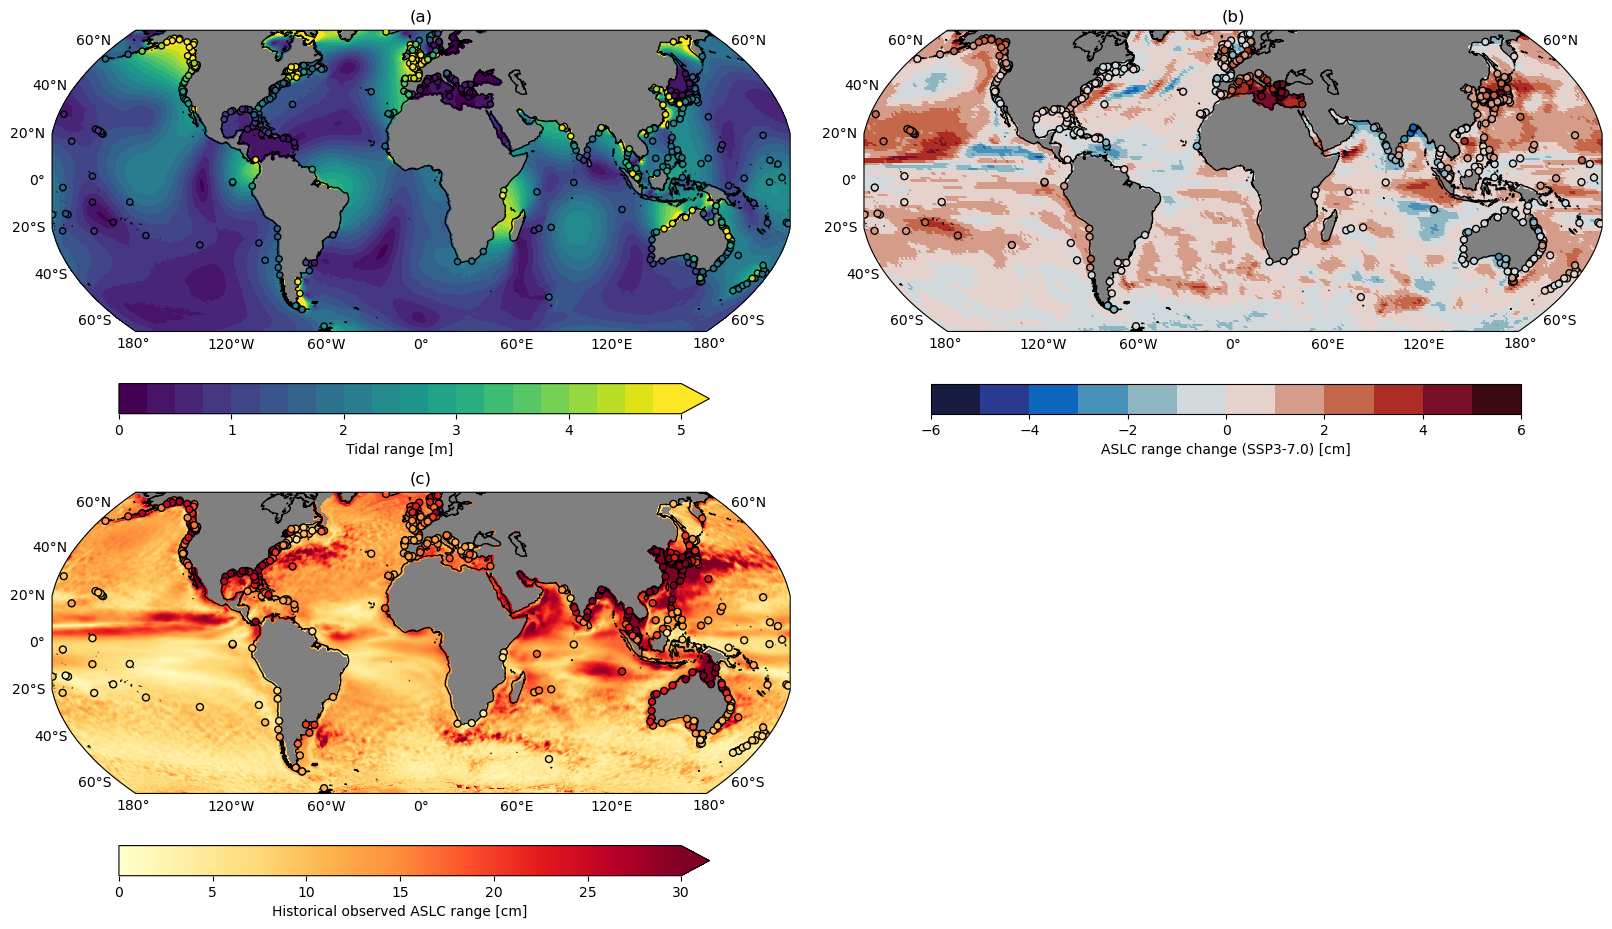

In [11]:
fig = plt.figure(figsize=(20,11))
gs1 = fig.add_gridspec(2,2,hspace=.2,wspace=.1)#,bottom=.56) #for the first plots

#RANGE
#median
balance_discrete = matplotlib.colors.LinearSegmentedColormap.from_list('Custom cmap',  [cmocean.cm.balance(i) for i in range(cmocean.cm.balance.N)], 12)

fig,ax = add_global_map_subplot(fig,0.01*tr_at_duacs,
                                 gs1[0,0],0,5,plt.get_cmap('viridis',20),'(a)',None,'below','EOT20 tidal range [m]','max')

s1=ax.scatter(hist_range_tgs.lon,hist_range_tgs.lat,
              c=0.01*tr_at_tgs,
               vmin=0,vmax=5,cmap=plt.get_cmap('viridis',25),edgecolor='black',s=20,marker='o',transform=ccrs.PlateCarree(),zorder=5)

ax.set_facecolor("gray")


fig,ax = add_global_map_subplot(fig,drange,
                                 gs1[0,1],-6,6,balance_discrete,'(b)',None,'below','ASLC range change (SSP3-7.0) [cm]')

s1=ax.scatter(hist_range_tgs.lon,hist_range_tgs.lat,
              c=drange_tgs,
               vmin=-6,vmax=6,cmap=balance_discrete,edgecolor='black',s=25,marker='o',transform=ccrs.PlateCarree(),zorder=5)

ax.set_facecolor("gray")

amp_discrete = matplotlib.colors.LinearSegmentedColormap.from_list('Custom cmap',  [cmocean.cm.amp(i) for i in range(cmocean.cm.amp.N)], 16)

fig,ax = add_global_map_subplot(fig,sla_ibe_range,
                                 gs1[1,0],0,30,'YlOrRd','(c)',None,'below','Historical observed ASLC range [cm]','max')
s1=ax.scatter(psmsl_range.lon,psmsl_range.lat,
              c=psmsl_range,
               vmin=0,vmax=30,cmap='YlOrRd',edgecolor='black',s=25,marker='o',transform=ccrs.PlateCarree(),zorder=5)

ax.set_facecolor("gray")
fig.show()

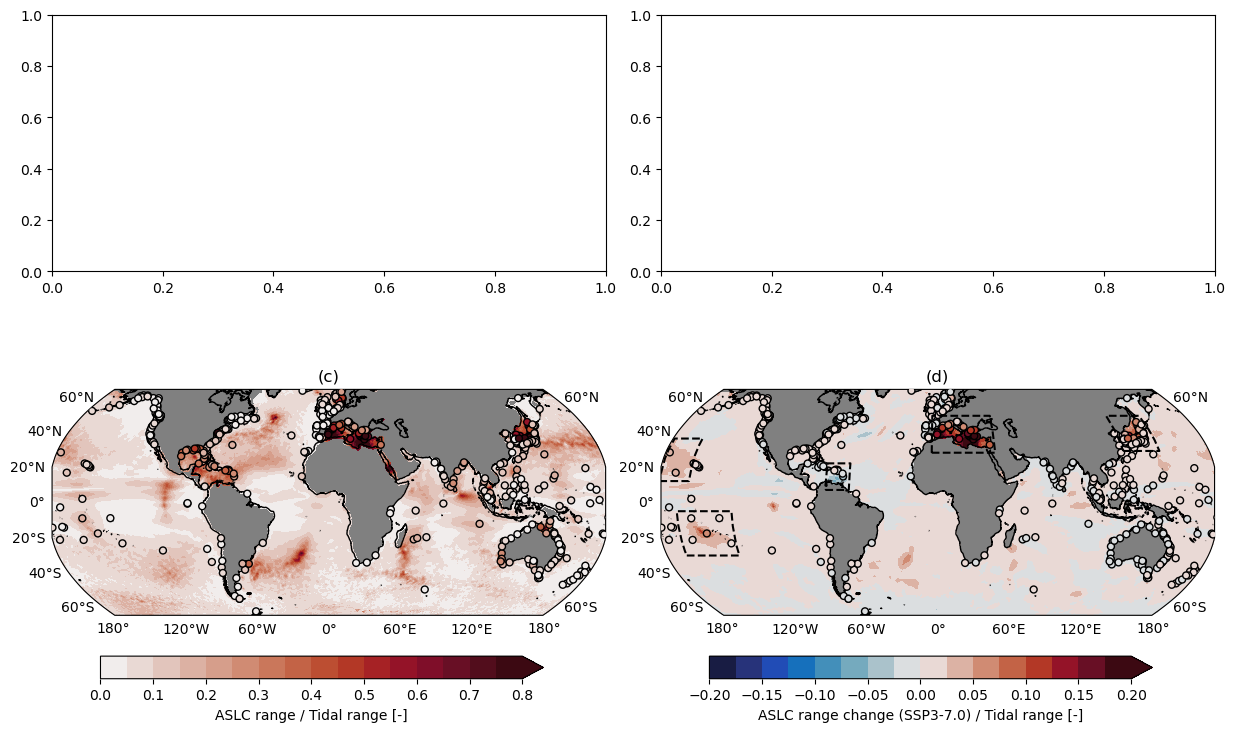

In [16]:
fig = plt.figure(figsize=(15,8))
gs1 = fig.add_gridspec(2,2,hspace=.4,wspace=.1) #define subplot grid


#(a) mean intertidal zones width as function of tidal range
ax = fig.add_subplot(gs1[0,0])

#(b) width change at specific locations
ax = fig.add_subplot(gs1[0,1])

#(c) plot historical ASLC range divided by tidal range
amp_discrete = matplotlib.colors.LinearSegmentedColormap.from_list('Custom cmap',  [cmocean.cm.amp(i) for i in range(cmocean.cm.amp.N)], 16) #define discrete colormap

fig,ax = add_global_map_subplot(fig,sla_ibe_range/tr_at_duacs,
                                 gs1[1,0],0,.8,amp_discrete,'(c)',None,'below','ASLC range / Tidal range [-]','max')
s1=ax.scatter(hist_range_tgs.lon,hist_range_tgs.lat,c=psmsl_range/tr_at_tgs,
               vmin=0,vmax=.8,cmap=amp_discrete,edgecolor='black',s=25,marker='o',transform=ccrs.PlateCarree(),zorder=5)
ax.set_facecolor("grey")


#(d) plot projected ASLC range change divided by tidal range
balance_discrete = matplotlib.colors.LinearSegmentedColormap.from_list('Custom cmap',  [cmocean.cm.balance(i) for i in range(cmocean.cm.balance.N)], 16)

fig,ax = add_global_map_subplot(fig,drange_at_duacs/tr_at_duacs,
                                 gs1[1,1],-.2,.2,balance_discrete,'(d)',None,'below','ASLC range change (SSP3-7.0) / Tidal range [-]','max')
s1=ax.scatter(hist_range_tgs.lon,hist_range_tgs.lat,c=drange_tgs/tr_at_tgs,
               vmin=-.2,vmax=.2,cmap=balance_discrete,edgecolor='black',s=25,marker='o',transform=ccrs.PlateCarree(),zorder=5)

ax.set_facecolor("grey")

#draw rectangles around regions of large changes relative to the tidal range
ax.plot([-4, 38, 38, -4, -4], [28, 28, 49, 49, 28],
         color='black', linewidth=1.5,linestyle='dashed',
         transform=ccrs.PlateCarree(),zorder=8, #remove this line to get straight lines
         )

ax.plot([-72, -57, -57, -72, -72], [7, 7, 22, 22, 7],
         color='black', linewidth=1.5,linestyle='dashed',
         transform=ccrs.PlateCarree(),zorder=8, #remove this line to get straight lines
         )

ax.plot([-167, -132, -132, -167, -167], [-30, -30, -5, -5, -30],
         color='black', linewidth=1.5,linestyle='dashed',
         transform=ccrs.PlateCarree(),zorder=8, #remove this line to get straight lines
         )

ax.plot([-179, -160, -160, -179, -179], [12, 12, 36, 36, 12],
         color='black', linewidth=1.5,linestyle='dashed',
         transform=ccrs.PlateCarree(),zorder=8, #remove this line to get straight lines
         )

ax.plot([123, 147, 147, 123, 123], [29, 29, 49, 49, 29],
         color='black', linewidth=1.5,linestyle='dashed',
         transform=ccrs.PlateCarree(),zorder=8, #remove this line to get straight lines
         )
fig.show()

(-0.1, 0.5)

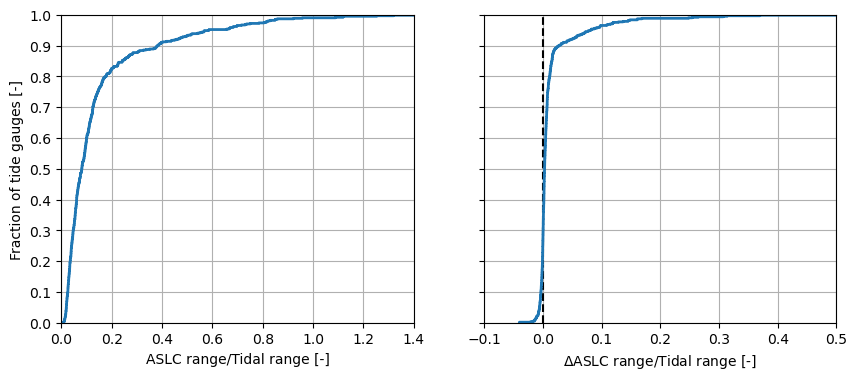

In [31]:

fig = plt.figure(figsize=(10,4))
a = psmsl_range/tr_at_tgs
a = a[np.isfinite(a)]
total_num = len(a)

ax1 = plt.subplot(1, 2, 1)
sns.ecdfplot(data=psmsl_range/tr_at_tgs,ax=ax1,linewidth=2)
ax1.grid()
ax1.set_xlim(0,1.4)
tick = np.arange(0,1.1,.1)

#ytick_labels = (tick * total_num).astype('int')
#ytick_labels = [str(ytick_labels[i])+' ('+str(int(100*tick[i]))+'%)' for i in np.arange(len(tick))]
ax1.set_yticks(tick)
ax1.set_ylabel('Fraction of tide gauges [-]')
ax1.set_xlabel('ASLC range/Tidal range [-]')

ax2 = plt.subplot(1, 2, 2)
ax2.axvline(x=0,color='black',linestyle='dashed')
sns.ecdfplot(data=drange_tgs/tr_at_tgs,ax=ax2,linewidth=2)
ax2.grid()

tick = np.arange(0,1.1,.1)

ytick_labels = (tick * total_num).astype('int')
ytick_labels = [str(ytick_labels[i])+' ('+str(int(100*tick[i]))+'%)' for i in np.arange(len(tick))]
ax2.set_yticks(tick,[])
ax2.set_ylabel('')
#ax2.set_ylabel('No. of tide gauges (rounded)')
ax2.set_xlabel(r'$\Delta$ASLC range/Tidal range [-]')
ax2.set_xlim([-.1,.5])